# 1. Install and Import Dependencies

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

C:\Users\kumar\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\kumar/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-18 Python-3.8.16 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:03<00:00, 4.06MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [6]:
img = 'I-80_Eastshore_Fwy.jpg'

In [7]:
results = model(img)
results.print()

image 1/1: 216x300 14 cars, 6 trucks
Speed: 66.0ms pre-process, 130.0ms inference, 137.7ms NMS per image at shape (1, 3, 480, 640)


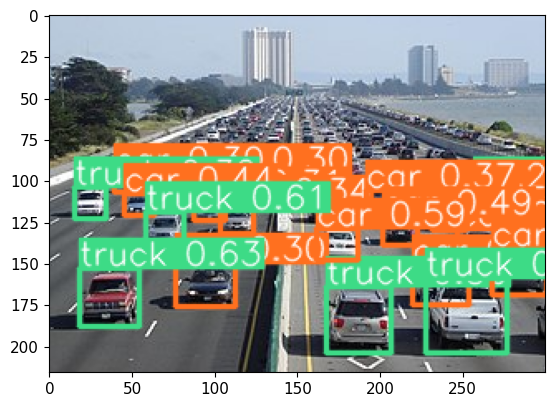

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
results.render()

[array([[[185, 202, 220],
         [185, 202, 220],
         [185, 202, 220],
         ...,
         [191, 207, 230],
         [191, 207, 230],
         [191, 207, 230]],
 
        [[185, 202, 220],
         [185, 202, 220],
         [185, 202, 220],
         ...,
         [191, 207, 230],
         [191, 207, 230],
         [191, 207, 230]],
 
        [[185, 202, 220],
         [185, 202, 220],
         [185, 202, 220],
         ...,
         [191, 207, 230],
         [191, 207, 230],
         [191, 207, 230]],
 
        ...,
 
        [[ 88,  88,  90],
         [ 89,  89,  91],
         [ 91,  91,  93],
         ...,
         [129, 131, 130],
         [123, 124, 126],
         [169, 170, 172]],
 
        [[ 88,  88,  90],
         [ 88,  88,  90],
         [ 89,  89,  91],
         ...,
         [125, 127, 126],
         [115, 116, 118],
         [139, 140, 142]],
 
        [[ 88,  88,  90],
         [ 88,  88,  90],
         [ 88,  88,  90],
         ...,
         [128, 130, 129],
  

# 4. Real Time Detections

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [8]:
import uuid   # Unique identifier
import os
import time

In [15]:
IMAGES_PATH = os.path.join('data', 'image') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10

In [22]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(10)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [23]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\image\awake.83e7b8a7-9a34-11ed-a60f-089798794a79.jpg


In [26]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(30):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\image\awake.9969e39f-9a34-11ed-bd9e-089798794a79.jpg
data\image\awake.9969e3a0-9a34-11ed-b046-089798794a79.jpg
data\image\awake.9969e3a1-9a34-11ed-b3b6-089798794a79.jpg
data\image\awake.9969e3a2-9a34-11ed-984f-089798794a79.jpg
data\image\awake.9969e3a3-9a34-11ed-a636-089798794a79.jpg
data\image\awake.9969e3a4-9a34-11ed-b3b2-089798794a79.jpg
data\image\awake.9969e3a5-9a34-11ed-8d9b-089798794a79.jpg
data\image\awake.9969e3a6-9a34-11ed-ac21-089798794a79.jpg
data\image\awake.9969e3a7-9a34-11ed-b99c-089798794a79.jpg
data\image\awake.9969e3a8-9a34-11ed-8b5c-089798794a79.jpg
data\image\awake.9969e3a9-9a34-11ed-8fcd-089798794a79.jpg
data\image\awake.9969e3aa-9a34-11ed-8ee9-089798794a79.jpg
data\image\awake.9969e3ab-9a34-11ed-a74a-089798794a79.jpg
data\image\awake.9969e3ac-9a34-11ed-9689-089798794a79.jpg
data\image\awake.9969e3ad-9a34-11ed-91cb-089798794a79.jpg
data\image\awake.9969e3ae-9a34-11ed-bd2b-089798794a79.jpg
data\image\awake.9969e3af-9a34-11ed-bc86-089798794a79.jpg
data\image\awa

In [19]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [20]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Using cached PyQt5-5.15.7-cp37-abi3-win_amd64.whl (6.8 MB)
  Using cached lxml-4.9.2-cp38-cp38-win_amd64.whl (3.9 MB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)
  Using cached PyQt5_sip-12.11.0-cp38-cp38-win_amd64.whl (78 kB)


In [48]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HgH3WWbZ6TUbl2Y4LTu4")
project = rf.workspace("panimalar").project("drowsiness-empbr")
dataset = project.version(2).download("yolov5")

     ---------------------------------------- 46.5/46.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 138.5/138.5 kB 4.1 MB/s eta 0:00:00
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
     ---------------------------------------- 54.5/54.5 kB ? eta 0:00:00
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached glob2-0.7.tar.gz (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9302 sha256=0f1d71c518572c6eb98cb20c834c3526c97dd8b543bc8e489b77b2a8660117a7
  Stored in directory: c:\users\kumar\appdata\local\pip\cache\wheels\a4\ea\9f\d399747c9a8cc7e57af9dc5dfa5e91f60efa41a80a0960902f
  Created whe

Extracting Dataset Version Zip to drowsiness-2 in yolov5pytorch:: 100%|█████████████████████████████████████████████████████████████████████████████| 366/366 [00:00<00:00, 545.45it/s]


In [2]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 1500 --data dataset.yaml --weights yolov5s.pt --workers 2

^C


# 6. Load Custom Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\kumar/.cache\torch\hub\master.zip
YOLOv5  2023-1-23 Python-3.8.16 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)



Exception: [Errno 2] No such file or directory: 'yolov5\\runs\\train\\exp9\\weights\\last.pt'. Cache may be out of date, try `force_reload=True` or see https://github.com/ultralytics/yolov5/issues/36 for help.

In [27]:
img = os.path.join('data', 'images', 'awake.005de685-9a33-11ed-bead-089798794a79.jpg')

In [28]:
results = model(img)

In [29]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 12.0ms pre-process, 81.0ms inference, 103.9ms NMS per image at shape (1, 3, 480, 640)


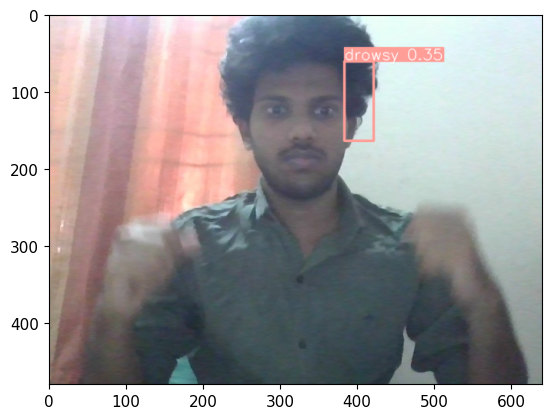

In [30]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [31]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()